In [1]:
from scipy import stats as sts
from matplotlib import pyplot as plt
from scipy.misc import derivative
import numpy as np

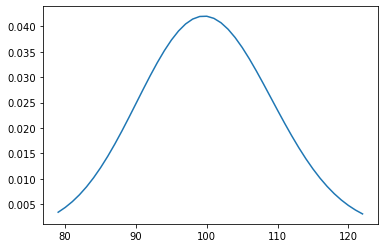

In [2]:
# First, set the binomial distribution to determine
# the appropriate mean and standard deviation for the normal approximation.

x = np.arange(sts.binom.ppf(0.01, 1000, 0.1),
              sts.binom.ppf(0.99, 1000, 0.1))

binom = sts.binom.pmf(x, n = 1000, p = 0.1)

plt.plot(x, binom)
plt.show()

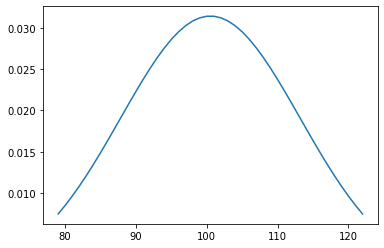

The 95% confidence interval for the sampling error is: -0.02488845585481205 0.024888455854812037


In [3]:
# Now, set the normal approximation.

norm = sts.norm.pdf(x, loc = x.mean(), scale = x.std())

plt.plot(x, norm)
plt.show()

def f(x):
    return sts.norm.pdf(x, loc = x.mean(), scale = x.std())

print('The 95% confidence interval for the sampling error is:', (sts.norm.ppf(0.025, loc = x.mean(), scale = x.std()) - x.mean())/1000, (sts.norm.ppf(0.975, loc = x.mean(), scale = x.std()) - x.mean())/1000)

In [4]:
def sampling_error(sample_size, percentage_estimated):

    x = np.arange(sts.binom.ppf(0.01, sample_size, percentage_estimated),
              sts.binom.ppf(0.99, sample_size, percentage_estimated))

    def f(x):
        return sts.norm.pdf(x, loc = x.mean(), scale = x.std())

    print('The 95% confidence interval for the sampling error is:', (sts.norm.ppf(0.025, loc = x.mean(), scale = x.std()) - x.mean())/sample_size, (sts.norm.ppf(0.975, loc = x.mean(), scale = x.std()) - x.mean())/sample_size)

The binomial distribution here is appropriate, since we determine the probability of the candidate winning in terms of either winning or losing.

Additionally: I have fixed the code almost by the start of the class, being confused with the approach described in the Study Guide, and ended up using my own understanding of the situation to find the sampling error.